In [12]:
#Importando las biblioteca que utilizaremos en este notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [13]:
#leyendo los datos de la tabla csv del gdrive
mars=pd.read_csv("/Users/carolinavega/Documents/UCM/Python/mars-weather.csv")

Analisando los datos que exiten en la base de datos

In [14]:
#Analisando la cantidad de datos
mars.shape

(1894, 10)

In [15]:
mars.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny


In [16]:
#analisando los datos estadisticos de los valores que utilizaremos en nuestro sensor
mars[["min_temp", "max_temp", "pressure"]].describe()

,min_temp,max_temp,pressure
count,1867.000000,1867.000000,1867.000000
mean,-76.121050,-12.510445,841.066417
std,5.504098,10.699454,54.253226
min,-90.000000,-35.000000,727.000000
25%,-80.000000,-23.000000,800.000000
50%,-76.000000,-11.000000,853.000000
75%,-72.000000,-3.000000,883.000000
max,-62.000000,11.000000,925.000000


In [17]:
#Como hemos visto muchos nulos decidimos contar cuantos nulos hay en la base de datos
mars.isnull().sum()

id                     0
terrestrial_date       0
sol                    0
ls                     0
month                  0
min_temp              27
max_temp              27
pressure              27
wind_speed          1894
atmo_opacity           0
dtype: int64

In [18]:
#analisando tambien la cantidad de valores zero por campo
(mars[['min_temp', 'max_temp', 'pressure', 'wind_speed']]==0).sum()

min_temp       0
max_temp      80
pressure       0
wind_speed     0
dtype: int64

In [19]:
#excluyendo las lineas que tienen todos los datos como null
mars=mars.dropna(how="all")

In [20]:
#mars = mars.dropna(subset=['min_temp', 'max_temp', 'pressure'])


In [21]:
#no habian lineas con todas las colunas null el tamaño del dataset sige el mismo
mars.shape

(1894, 10)

In [22]:
# Analisis de datos faltantes por columna
missings_por_coluna=mars.isna().sum()
missings_por_coluna=pd.DataFrame(missings_por_coluna,columns=['n']).reset_index().rename(columns={'index':'variaveis'})
linhas=mars.shape[0]
missings_por_coluna.assign(perc_missings=missings_por_coluna['n']/linhas).sort_values('n',ascending=False)


,variaveis,n,perc_missings
8,wind_speed,1894,1.000000
5,min_temp,27,0.014256
6,max_temp,27,0.014256
7,pressure,27,0.014256
0,id,0,0.000000
1,terrestrial_date,0,0.000000
2,sol,0,0.000000
3,ls,0,0.000000
4,month,0,0.000000
9,atmo_opacity,0,0.000000


Text(0.5, 0, 'Min Temp')

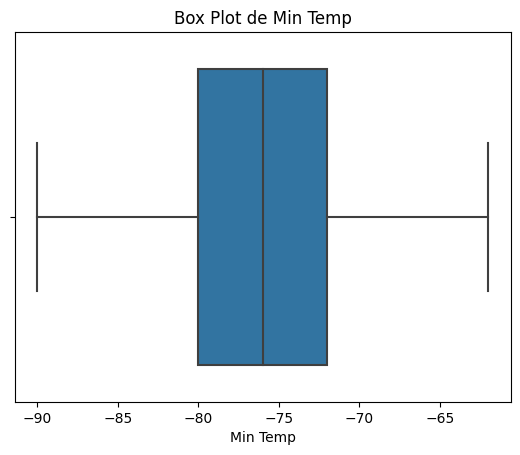

In [23]:
# Analisis de Outliers Temperatura Min
g = sns.boxplot(data = mars, x = 'min_temp')
g.set_title('Box Plot de Min Temp')
g.set_xlabel('Min Temp')

Text(0.5, 0, 'Max Temp')

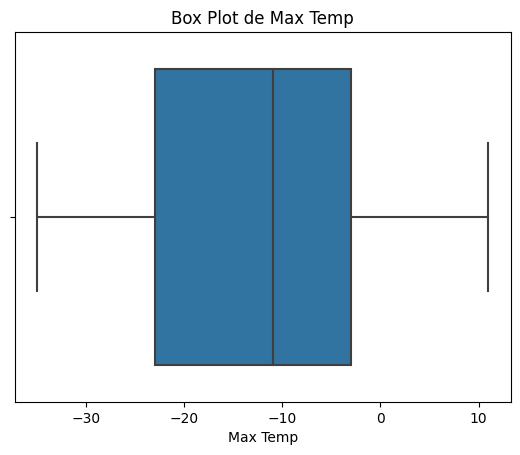

In [24]:
#Analisis de Outliers Temperatura Min
g = sns.boxplot(data = mars, x = 'max_temp')
g.set_title('Box Plot de Max Temp')
g.set_xlabel('Max Temp')

Text(0.5, 0, 'Presion')

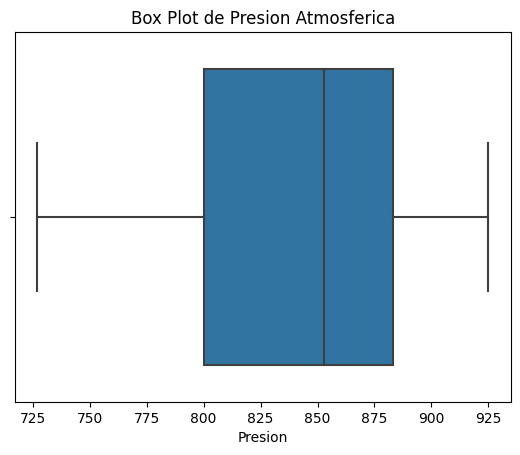

In [25]:
# Analisis de Outliers Presion Atmosferica
g = sns.boxplot(data = mars, x = 'pressure')
g.set_title('Box Plot de Presion Atmosferica')
g.set_xlabel('Presion')

In [26]:
# Utilizando la funci'on describe para crear las metricas
stats_min_temp = mars['min_temp'].describe().loc[['mean', 'std', 'min', 'max', '25%', '50%', '75%']]
stats_max_temp= mars['max_temp'].describe().loc[['mean', 'std', 'min', 'max', '25%', '50%', '75%']]
stats_pressure = mars['pressure'].describe().loc[['mean', 'std', 'min', 'max', '25%', '50%', '75%']]


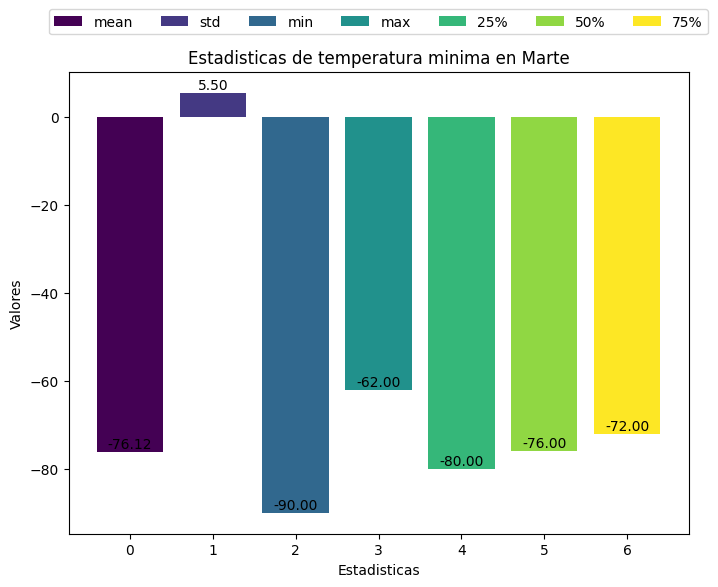

In [27]:
# Definir una paleta de colores para las barras
colors = plt.cm.viridis(np.linspace(0, 1, len(stats_min_temp)))

# Plotting los datos generales de la estatistica de temperatura minima
plt.figure(figsize=(8, 6))


bars = plt.bar(np.arange(len(stats_min_temp)), stats_min_temp.values, color=colors)
for i, v in enumerate(stats_min_temp.values):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', color='black')

# Añadir leyenda
plt.legend(bars, stats_min_temp.index, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(stats_min_temp))

plt.title('Estadisticas de temperatura minima en Marte')
plt.xlabel('Estadisticas')
plt.ylabel('Valores')
plt.show()

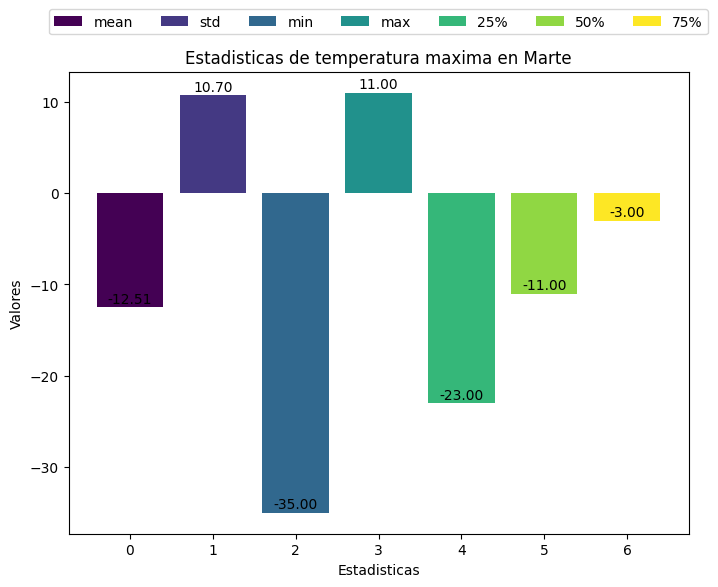

In [28]:
# Definir una paleta de colores
colors = plt.cm.viridis(np.linspace(0, 1, len(stats_max_temp)))

# Plotting los datos generales de la estatistica de temperatura maxima
plt.figure(figsize=(8, 6))

bars = plt.bar(np.arange(len(stats_max_temp)), stats_max_temp.values, color=colors)
for i, v in enumerate(stats_max_temp.values):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', color='black')

# Añadir leyenda
plt.legend(bars, stats_max_temp.index, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(stats_pressure))

plt.title('Estadisticas de temperatura maxima en Marte')
plt.xlabel('Estadisticas')
plt.ylabel('Valores')
plt.show()

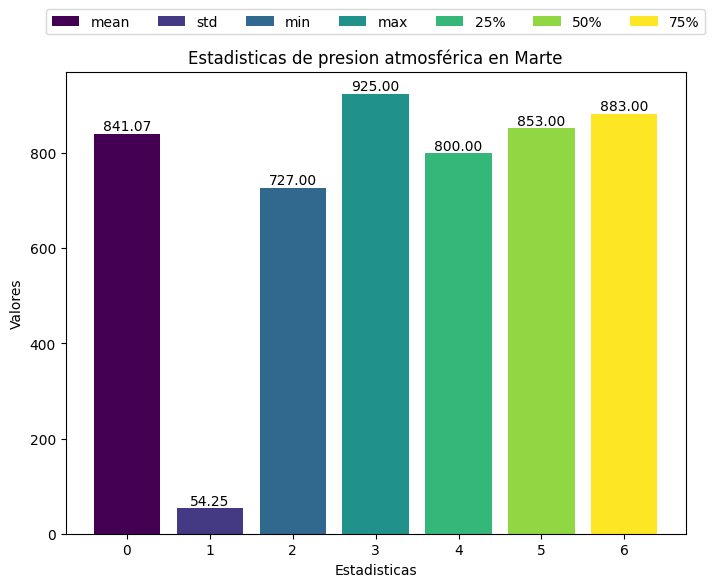

In [29]:
# Definir una paleta de colores
colors = plt.cm.viridis(np.linspace(0, 1, len(stats_pressure)))

# Plotting los datos generales de la estadística de presión atmosférica
plt.figure(figsize=(8, 6))

bars = plt.bar(np.arange(len(stats_pressure)), stats_pressure.values, color=colors)
for i, v in enumerate(stats_pressure.values):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', color='black')

# Añadir leyenda
plt.legend(bars, stats_pressure.index, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(stats_pressure))


plt.title('Estadisticas de presion atmosférica en Marte')
plt.xlabel('Estadisticas')
plt.ylabel('Valores')
plt.show()


**Haciendo las medias de temperaturas y presion por mes terrestrial**

In [30]:
#creando un dataset agrupado por mes de los datos estadisticos de temperatura y presion atmosferica
mars["terrestrial_date"]=pd.to_datetime(mars["terrestrial_date"])
mars = mars.sort_values(by="terrestrial_date")
# Definir la agregación para calcular la media y percentiles
mars_monthly = mars.groupby(mars['terrestrial_date'].dt.month).agg({
    'min_temp': ['mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)],
    'max_temp': ['mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)],
    'pressure': ['mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)]
}).reset_index()

# Renombrar las columnas para mayor claridad
mars_monthly.columns = ['terrestrial_date', 'min_temp_mean', 'min_temp_25%', 'min_temp_50%', 'min_temp_75%',
                        'max_temp_mean', 'max_temp_25%', 'max_temp_50%', 'max_temp_75%',
                        'pressure_mean', 'pressure_25%', 'pressure_50%', 'pressure_75%']

# Visualizar los resultados
print(mars_monthly)

    terrestrial_date  min_temp_mean  min_temp_25%  min_temp_50%  min_temp_75%  \
0                  1     -76.988506        -85.75         -77.5         -71.0   
1                  2     -76.909091        -84.00         -77.0         -71.0   
2                  3     -77.349206        -83.00         -76.0         -72.0   
3                  4     -76.098592        -80.00         -76.0         -72.0   
4                  5     -75.573427        -78.00         -75.0         -73.0   
5                  6     -75.671233        -78.00         -76.0         -74.0   
6                  7     -76.177305        -77.00         -76.0         -75.0   
7                  8     -75.851613        -78.00         -76.0         -74.0   
8                  9     -75.816092        -79.00         -77.0         -73.0   
9                 10     -75.685083        -80.00         -76.0         -71.0   
10                11     -75.537975        -81.00         -75.5         -70.0   
11                12     -75

In [31]:
mars_monthly.head()


,terrestrial_date,min_temp_mean,min_temp_25%,min_temp_50%,min_temp_75%,max_temp_mean,max_temp_25%,max_temp_50%,max_temp_75%,pressure_mean,pressure_25%,pressure_50%,pressure_75%
0,1,-76.988506,-85.75,-77.5,-71.0,-14.264368,-26.0,-19.0,-2.0,861.258621,835.25,873.0,908.00
1,2,-76.909091,-84.00,-77.0,-71.0,-14.175325,-25.0,-13.5,-3.0,837.967532,797.25,848.5,882.75
2,3,-77.349206,-83.00,-76.0,-72.0,-13.269841,-23.0,-12.0,-4.0,827.722222,806.25,833.0,862.00
3,4,-76.098592,-80.00,-76.0,-72.0,-11.492958,-19.0,-9.0,-4.0,817.676056,777.00,833.0,850.00
4,5,-75.573427,-78.00,-75.0,-73.0,-10.832168,-15.0,-12.0,-5.0,803.601399,749.50,840.0,843.00


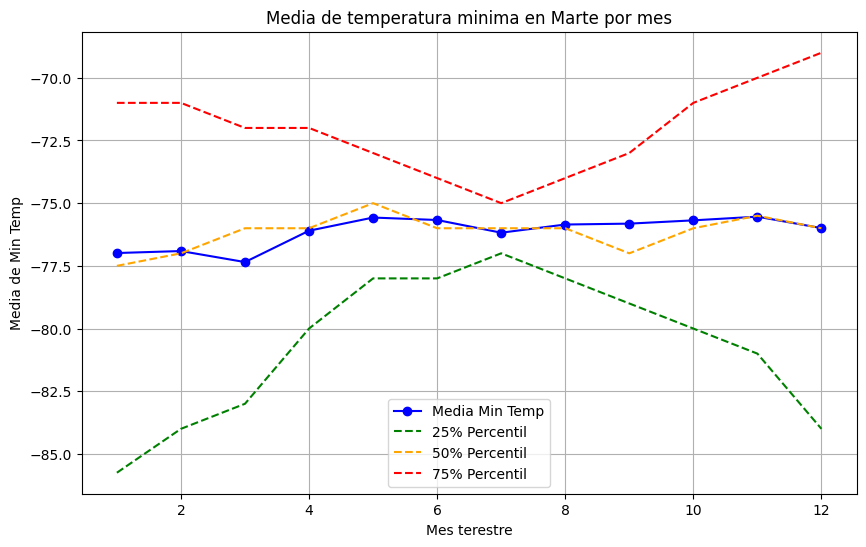

In [32]:
#Creando graficos de media de temperatua minima por mes en Marte
plt.figure(figsize=(10, 6))
plt.plot(mars_monthly['terrestrial_date'], mars_monthly['min_temp_mean'], marker='o', label='Media Min Temp', color='blue')
# Líneas para percentiles 25%, 50%, y 75%
plt.plot(mars_monthly['terrestrial_date'], mars_monthly['min_temp_25%'], linestyle='--', label='25% Percentil', color='green')
plt.plot(mars_monthly['terrestrial_date'], mars_monthly['min_temp_50%'], linestyle='--', label='50% Percentil', color='orange')
plt.plot(mars_monthly['terrestrial_date'], mars_monthly['min_temp_75%'], linestyle='--', label='75% Percentil', color='red')


plt.xlabel('Mes terestre')
plt.ylabel('Media de Min Temp')
plt.title('Media de temperatura minima en Marte por mes')
plt.legend()
plt.grid(True)
plt.show()

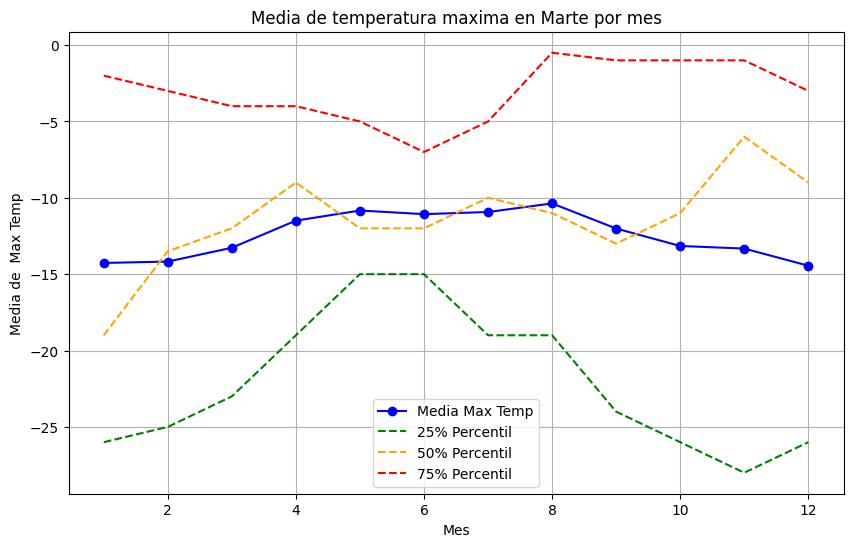

In [33]:
#Creando graficos de media de temperatua maxima por mes en Marte
plt.figure(figsize=(10, 6))
plt.plot(mars_monthly['terrestrial_date'], mars_monthly['max_temp_mean'], marker='o', label='Media Max Temp', color='blue')
# Líneas para percentiles 25%, 50%, y 75%
plt.plot(mars_monthly['terrestrial_date'], mars_monthly['max_temp_25%'], linestyle='--', label='25% Percentil', color='green')
plt.plot(mars_monthly['terrestrial_date'], mars_monthly['max_temp_50%'], linestyle='--', label='50% Percentil', color='orange')
plt.plot(mars_monthly['terrestrial_date'], mars_monthly['max_temp_75%'], linestyle='--', label='75% Percentil', color='red')
plt.xlabel('Mes')
plt.ylabel('Media de  Max Temp')
plt.title('Media de temperatura maxima en Marte por mes')
plt.legend()
plt.grid(True)
plt.show()

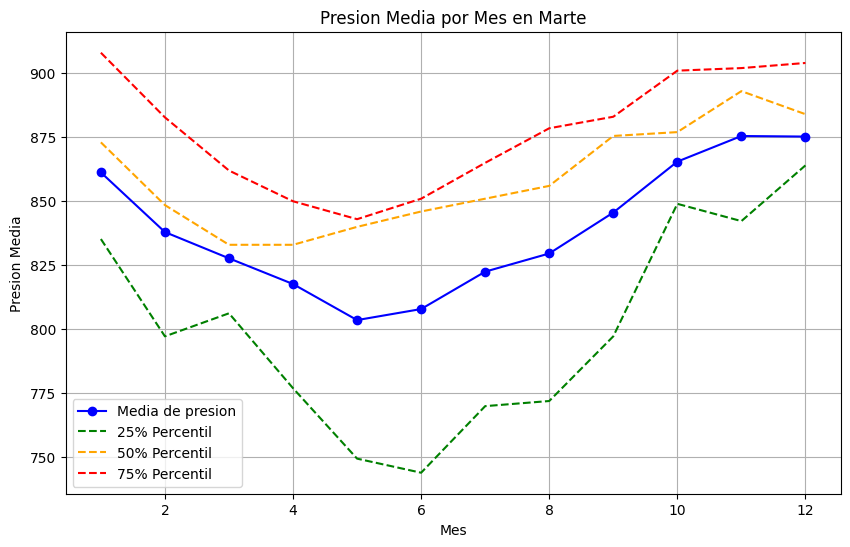

In [34]:
# Plot Mean Pressure
plt.figure(figsize=(10, 6))
plt.plot(mars_monthly['terrestrial_date'], mars_monthly['pressure_mean'], marker='o', label='Media de presion', color='blue')
plt.plot(mars_monthly['terrestrial_date'], mars_monthly['pressure_25%'], linestyle='--', label='25% Percentil', color='green')
plt.plot(mars_monthly['terrestrial_date'], mars_monthly['pressure_50%'], linestyle='--', label='50% Percentil', color='orange')
plt.plot(mars_monthly['terrestrial_date'], mars_monthly['pressure_75%'], linestyle='--', label='75% Percentil', color='red')
plt.xlabel('Mes')
plt.ylabel('Presion Media')
plt.title('Presion Media por Mes en Marte')
plt.legend()
plt.grid(True)
plt.show()